In [1]:
'''
get file in jupyter cell
%load filename.py

save to file from jupyter cell (will overwrite)
%%writefile filename.py
'''

'\nget file in jupyter cell\n%load filename.py\n\nsave to file from jupyter cell (will overwrite)\n%%writefile filename.py\n'

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
results_raw = pd.read_csv('data/dime.csv', low_memory=False)

In [4]:
results_raw.columns

Index(['election', 'cycle', 'fecyear', 'Cand.ID', 'FEC.ID', 'NID', 'ICPSR',
       'ICPSR2', 'bonica.rid', 'bonica.cid', 'name', 'lname', 'ffname',
       'fname', 'mname', 'nname', 'title', 'suffix', 'party', 'state', 'seat',
       'district', 'Incum.Chall', 'recipient.cfscore', 'contributor.cfscore',
       'recipient.cfscore.dyn', 'dwnom1', 'dwnom2', 'ps.dwnom1', 'ps.dwnom2',
       'dwdime', 'irt.cfscore', 'num.givers', 'num.givers.total',
       'n.data.points.personal.donations',
       'n.data.points.personal.donations.unq', 'cand.gender',
       'total.disbursements', 'total.pc.contribs', 'contribs.from.candidate',
       'unitemized', 'non.party.ind.exp.for', 'non.party.ind.exp.against',
       'ind.exp.for', 'ind.exp.against', 'comm.cost.for', 'comm.cost.against',
       'party.coord.exp', 'party.ind.exp.against', 'total.receipts',
       'total.indiv.contrib', 'total.pac.contribs', 'ran.primary',
       'ran.general', 'p.elec.stat', 's.elec.stat', 'r.elec.stat',
       'gen

In [5]:
col_list = ['election', 'cycle', 'Cand.ID', 'ICPSR', 'name', 'lname', 'fname','party', 
            'state', 'seat', 'district', 'Incum.Chall', 'num.givers', 'num.givers.total', 'cand.gender',
            'total.disbursements', 'total.pc.contribs', 'contribs.from.candidate', 'total.receipts',
            'total.indiv.contrib', 'total.pac.contribs', 'ran.general','gen.elec.stat', 
            'gen.elect.pct', 'winner', 'district.partisanship']

In [6]:
results_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176777 entries, 0 to 176776
Data columns (total 74 columns):
election                                176777 non-null object
cycle                                   176777 non-null int64
fecyear                                 176775 non-null float64
Cand.ID                                 175464 non-null object
FEC.ID                                  47710 non-null object
NID                                     31390 non-null object
ICPSR                                   176777 non-null object
ICPSR2                                  176777 non-null object
bonica.rid                              176777 non-null object
bonica.cid                              88164 non-null float64
name                                    176777 non-null object
lname                                   146259 non-null object
ffname                                  145229 non-null object
fname                                   145911 non-null object
mname    

In [7]:
results = results_raw.loc[:, col_list]
results = results[results['ran.general']==1]
results = results[~results['gen.elect.pct'].isna()]
results = results[results.seat == 'federal:house']

In [8]:
results.iloc[:,:15].head()

,election,cycle,Cand.ID,ICPSR,name,lname,fname,party,state,seat,district,Incum.Chall,num.givers,num.givers.total,cand.gender
89,fd1980,1980,H6PA07022,142171980,"edgar, robert w.",edgar,robert,100,PA,federal:house,PA07,I,61.0,670,M
92,fd1980,1980,H6PA24043,144361980,"marks, marc lincoln",marks,marc,200,PA,federal:house,PA24,I,45.0,46,M
97,fd1980,1980,H6OK06036,142191980,"english, glenn lee jr",english,glenn,100,OK,federal:house,OK06,I,33.0,229,M
104,fd1980,1980,H6OK05038,144151980,"edwards, marvin h ""mickey""",edwards,marvin,200,OK,federal:house,OK05,I,110.0,566,M
160,fd1980,1980,H6CA26027,105531980,"rousselot, john h",rousselot,john,200,CA,federal:house,CA26,I,222.0,455,M


In [9]:
results.iloc[:,15:].head()

,total.disbursements,total.pc.contribs,contribs.from.candidate,total.receipts,total.indiv.contrib,total.pac.contribs,ran.general,gen.elec.stat,gen.elect.pct,winner,district.partisanship
89,15794.0,0.0,0.0,15795.0,11004.0,4791.0,1.0,L,0,L,0.599
92,10740.0,0.0,0.0,10741.0,10741.0,0.0,1.0,L,0,L,-0.024
97,3669.0,0.0,0.0,3702.0,3202.0,500.0,1.0,L,0,L,0.931
104,88045.0,0.0,0.0,88046.0,86546.0,1500.0,1.0,L,0,L,1.261
160,325751.0,0.0,0.0,237769.0,180779.0,56990.0,1.0,L,0,L,-0.126


In [10]:
results.groupby(['cycle', 'district']).count()

election  Cand.ID  ICPSR  name  lname  fname  party  state  \
cycle district                                                               
1980  AK01             2        2      2     2      2      2      2      2   
      AL01             1        1      1     1      1      1      1      1   
      AL02             2        2      2     2      2      2      2      2   
      AL03             1        1      1     1      1      1      1      1   
      AL04             1        1      1     1      1      1      1      1   
      AL05             1        1      1     1      1      1      1      1   
      AL06             3        3      3     3      3      3      3      3   
      AL07             1        1      1     1      1      1      1      1   
      AR02             1        1      1     1      1      1      1      1   
      AR03             1        1      1     1      1      1      1      1   
      AR04             1        1      1     1      1      1      1      1   
      AS01             1        1      1     1      1      1      1      1   
      AZ01             2        2      2     2      2      2      2      2   
      AZ02             1        1      1     1      1      1      1      1   
      AZ03             1        1      1     1      1      1      1      1   
      AZ04             2        2      2     2      2      2      2      2   
      CA01             2        2      2     2      2      2      2      2   
      CA02             4        4      4     4      4      4      4      4   
      CA03             1        1      1     1      1      1      1      1   
      CA04             1        1      1     1      1      1      1      1   
      CA05             2        2      2     2      2      2      2      2   
      CA06             2        2      2     2      2      2      2      2   
      CA07             2        2      2     2      2      2      2      2   
      CA08             2        2      2     2      2      2      2      2   
      CA09             2        2      2     2      2      2      2      2   
      CA10             2        2      2     2      2      2      2      2   
      CA11             2        2      2     2      2      2      2      2   
      CA12             1        1      1     1      1      1      1      1   
      CA13             1        1      1     1      1      1      1      1   
      CA14             3        3      3     3      3      3      3      3   
...                  ...      ...    ...   ...    ...    ...    ...    ...   
2014  VA05             2        2      2     2      2      2      2      2   
      VA06             1        1      1     1      1      1      1      1   
      VA07             2        2      2     2      2      2      2      2   
      VA08             2        2      2     2      2      2      2      2   
      VA09             1        1      1     1      1      1      1      1   
      VA10             2        2      2     2      2      2      2      2   
      VA11             2        2      2     2      2      2      2      2   
      VT01             2        2      2     2      2      2      2      2   
      WA01             2        2      2     2      2      2      2      2   
      WA02             1        1      1     1      1      1      1      1   
      WA03             2        2      2     2      2      2      2      2   
      WA04             2        2      2     2      2      2      2      2   
      WA05             2        2      2     2      2      2      2      2   
      WA06             1        1      1     1      1      1      1      1   
      WA07             1        1      1     1      1      1      1      1   
      WA08             2        2      2     2      2      2      2      2   
      WA09             1        1      1     1      1      1      1      1   
      WA10             2        2      2     2      2      2      2      2   
      WI01             2        2     

In [11]:
results['race_ID'] = results['cycle'].astype(str) + "-"+ results['district'].astype(str)

In [12]:
results.head()

,election,cycle,Cand.ID,ICPSR,name,lname,fname,party,state,seat,...,contribs.from.candidate,total.receipts,total.indiv.contrib,total.pac.contribs,ran.general,gen.elec.stat,gen.elect.pct,winner,district.partisanship,race_ID
89,fd1980,1980,H6PA07022,142171980,"edgar, robert w.",edgar,robert,100,PA,federal:house,...,0.0,15795.0,11004.0,4791.0,1.0,L,0,L,0.599,1980-PA07
92,fd1980,1980,H6PA24043,144361980,"marks, marc lincoln",marks,marc,200,PA,federal:house,...,0.0,10741.0,10741.0,0.0,1.0,L,0,L,-0.024,1980-PA24
97,fd1980,1980,H6OK06036,142191980,"english, glenn lee jr",english,glenn,100,OK,federal:house,...,0.0,3702.0,3202.0,500.0,1.0,L,0,L,0.931,1980-OK06
104,fd1980,1980,H6OK05038,144151980,"edwards, marvin h ""mickey""",edwards,marvin,200,OK,federal:house,...,0.0,88046.0,86546.0,1500.0,1.0,L,0,L,1.261,1980-OK05
160,fd1980,1980,H6CA26027,105531980,"rousselot, john h",rousselot,john,200,CA,federal:house,...,0.0,237769.0,180779.0,56990.0,1.0,L,0,L,-0.126,1980-CA26


In [13]:
num_cand = results.race_ID.value_counts()
num_cand_df = pd.DataFrame()
num_cand_df = num_cand[num_cand>1]
results = results[results['race_ID'].isin(num_cand_df.reset_index()['index'])]
results = results[results['gen.elect.pct'] != '?? ']

In [14]:
results.loc[:,'gen.elect.pct'] = results['gen.elect.pct'].astype(float).copy()

In [15]:
results.head()

,election,cycle,Cand.ID,ICPSR,name,lname,fname,party,state,seat,...,contribs.from.candidate,total.receipts,total.indiv.contrib,total.pac.contribs,ran.general,gen.elec.stat,gen.elect.pct,winner,district.partisanship,race_ID
89,fd1980,1980,H6PA07022,142171980,"edgar, robert w.",edgar,robert,100,PA,federal:house,...,0.0,15795.0,11004.0,4791.0,1.0,L,0.0,L,0.599,1980-PA07
92,fd1980,1980,H6PA24043,144361980,"marks, marc lincoln",marks,marc,200,PA,federal:house,...,0.0,10741.0,10741.0,0.0,1.0,L,0.0,L,-0.024,1980-PA24
104,fd1980,1980,H6OK05038,144151980,"edwards, marvin h ""mickey""",edwards,marvin,200,OK,federal:house,...,0.0,88046.0,86546.0,1500.0,1.0,L,0.0,L,1.261,1980-OK05
160,fd1980,1980,H6CA26027,105531980,"rousselot, john h",rousselot,john,200,CA,federal:house,...,0.0,237769.0,180779.0,56990.0,1.0,L,0.0,L,-0.126,1980-CA26
197,fd1980,1980,H8WV03014,148651980,"staton, david michael ""mick""",staton,david,200,WV,federal:house,...,0.0,70755.0,25572.0,32321.0,1.0,W,53.0,W,-0.342,1980-WV03


In [16]:
# find indices of top 2 candidates per race 
top2_cand = results.groupby('race_ID')['gen.elect.pct'].nlargest(2)

# make dictionary with values equal to set of names of top 2 candidates 
cand_pair_dct = {}
for pair in top2_cand.index:
    cand_id = results.loc[pair[1], 'Cand.ID']
    if pair[0] not in cand_pair_dct:
        cand_pair_dct[pair[0]] = []
    cand_pair_dct[pair[0]].append(cand_id)

# for k, v in cand_pair_dct.items():
#     cand_pair_dct[k] = list(v)

In [17]:
cand_pair_dct2 = {}
for pair in top2_cand.index:
    cand_id = results.loc[pair[1], 'ICPSR']
    if pair[0] not in cand_pair_dct2:
        cand_pair_dct2[pair[0]] = []
    cand_pair_dct2[pair[0]].append(cand_id)

In [18]:
results.loc[:,'top2'] = results['race_ID'].copy().apply(lambda x: cand_pair_dct[x])

In [19]:
from itertools import chain
rev_dict = {}
for key, value in cand_pair_dct.items():
    rev_dict.setdefault(str(value), set()).add(key)
rematch_sets = [sorted(values) for key, values in rev_dict.items() if len(values) > 1]

In [20]:
rematch_cand = [list(values) for values in cand_pair_dct2.values()]

In [21]:
rematch_cand_A = [each[0] for each in rematch_cand if len(each)==2]
rematch_cand_B = [each[1] for each in rematch_cand if len(each)==2]

In [22]:
rematch_race_id = []
for y in rematch_sets:
    for x in y:
        rematch_race_id.append(x)

rematch_cand_id = []
for y in rematch_cand:
    for x in y:
        rematch_cand_id.append(x)    

rematch_cand_id = list(set(rematch_cand_id))

In [23]:
print(len(rematch_race_id))
rematch_race_id

1180


['1980-CA09',
 '1982-CA09',
 '1980-CA11',
 '1982-CA11',
 '1980-CA36',
 '1982-CA36',
 '1984-CA36',
 '1988-CA36',
 '1980-CA37',
 '1992-CA40',
 '1994-CA40',
 '1980-CT02',
 '1982-CT02',
 '1980-CT04',
 '1982-CT04',
 '1980-IA03',
 '1982-IA03',
 '1980-IL17',
 '1982-IL04',
 '1980-IN10',
 '1992-IN02',
 '1980-KY02',
 '1982-KY02',
 '1980-MA02',
 '1982-MA02',
 '1984-MA02',
 '1980-MA06',
 '1982-MA06',
 '1980-MD02',
 '1982-MD02',
 '1980-MO01',
 '1982-MO01',
 '1980-NC05',
 '1982-NC05',
 '1980-NE02',
 '1982-NE02',
 '1980-NJ03',
 '1982-NJ03',
 '1980-NM01',
 '1984-NM01',
 '1980-OH05',
 '1982-OH05',
 '1984-OH05',
 '1980-OH14',
 '1982-OH14',
 '1980-OK03',
 '1982-OK03',
 '1980-OK04',
 '1982-OK04',
 '1980-TX13',
 '1982-TX13',
 '1980-TX21',
 '1984-TX21',
 '1980-UT01',
 '1986-UT01',
 '1988-UT01',
 '1980-VA08',
 '1982-VA08',
 '1980-WA05',
 '1982-WA05',
 '1992-WA05',
 '1982-CA04',
 '1984-CA04',
 '1982-CA10',
 '1984-CA10',
 '1982-CA24',
 '1984-CA24',
 '1982-CT03',
 '1984-CT03',
 '1982-IL16',
 '1984-IL16',
 '1982

In [24]:
print(len(rematch_cand_id))
rematch_cand_id

11717


['293182004',
 '209082008',
 '151111984',
 '295441998',
 '140721998',
 '150631986',
 '293932010',
 'H0NM010981990',
 'H6OH060531988',
 'H6FL040631996',
 '154331986',
 'H0GA030332000',
 '130401980',
 '293112000',
 'H8AZ080182008',
 '150361994',
 '207262006',
 '293182000',
 'H0NY200531990',
 '299171998',
 'H6NY291011988',
 'H8UT010591998',
 'H8NY220521998',
 '297462002',
 'H0CA030782010',
 'H0CA301052010',
 'H8NJ010511988',
 '146311988',
 'H0TX190432010',
 '144352012',
 'H0TX240191980',
 '209272010',
 'H0SC061952010',
 'H2FL061092014',
 '150332000',
 '295021998',
 'H0SC042572012',
 '297072006',
 '150502002',
 '156191994',
 '146081986',
 'H6FL021411998',
 '154381998',
 '150321992',
 '293851994',
 'H2MA100391992',
 '207272006',
 'H8MN050981998',
 '151291988',
 '154441988',
 '291001998',
 '293462008',
 '148692002',
 '148061984',
 'H4CA080792004',
 '150262000',
 'H0OK040831982',
 '297632004',
 '142901980',
 '291431992',
 '291371996',
 '293451996',
 '148101980',
 'H4PA080582004',
 '150641998'

In [25]:
col_short_list = ['election', 'Cand.ID', 'ICPSR', 'name','party', 'state', 'district', 
                  'Incum.Chall', 'total.disbursements', 'total.receipts','gen.elec.stat',
                  'gen.elect.pct', 'winner', 'district.partisanship', 'race_ID']

In [26]:
results = results[col_short_list]

In [27]:
results = results[results['ICPSR'].isin(rematch_cand_id)]

In [28]:
match_one = [x[0] for x in rematch_sets]
match_two = [x[1] for x in rematch_sets]

In [29]:
match1_df = results[results['race_ID'].isin(match_one)].copy()
match2_df = results[results['race_ID'].isin(match_two)].copy()

In [268]:
### Move to New Notebook
match1_df[match1_df['district.partisanship'].isna()]

,election,Cand.ID,ICPSR,name,party,state,district,Incum.Chall,total.disbursements,total.receipts,gen.elec.stat,gen.elect.pct,winner,district.partisanship,race_ID
5787,fd1988,H8GU01012,H8GU010121988,"pangelinan, vicente (ben) cabrera",100,GU,GU01,C,34959.00,35112.00,L,45.00,L,NaN,1988-GU01
6143,fd1988,H2GU00017,H2GU000171988,"blaz, ben garrido",200,GU,GU01,I,70397.00,77717.00,W,54.00,W,NaN,1988-GU01
10973,fd1994,H4AS00036,H4AS000361994,"radewagen, amata c",200,AS,AS01,C,17848.00,18203.00,L,20.00,L,NaN,1994-AS01
11304,fd1994,H0AS00018,H0AS000181994,"faleomavaega, eni f h",100,AS,AS01,I,78912.00,80046.00,W,63.00,W,NaN,1994-AS01
12936,fd1996,H4VI00054,H4VI000541996,"christian green, donna",100,VI,VI01,C,101036.00,101129.00,W,51.00,W,NaN,1996-VI01
13165,fd1996,H2VI00033,H2VI000331996,"frazer, victor o",328,VI,VI01,I,23087.00,23741.00,L,48.00,L,NaN,1996-VI01
14440,fd1998,H8GU00014,H8GU000141998,"cruz, manuel quitugua",200,GU,GU01,C,33058.00,37583.00,L,0.00,L,NaN,1998-GU01
14841,fd1998,H2GU00025,H2GU000251998,"underwood, robert a",100,GU,GU01,I,90873.00,93645.00,W,100.00,W,NaN,1998-GU01
19395,fd2004,H4AS00036,H4AS000362004,"coleman, aumua amata",200,AS,AS01,C,41139.00,41055.00,L,0.00,L,NaN,2004-AS01
19651,fd2004,H0AS00018,H0AS000182004,"faleomavaega, eni",100,AS,AS01,I,117308.00,117413.00,L,0.00,L,NaN,2004-AS01


In [267]:
# Move to New Notebook
match2_df[match2_df['district.partisanship'].isna()]

,election,Cand.ID,ICPSR,name,party,state,district,Incum.Chall,total.disbursements,total.receipts,gen.elec.stat,gen.elect.pct,winner,district.partisanship,race_ID
6995,fd1990,H8GU01012,H8GU010121990,"pangelinan, vicente c",100,GU,GU01,C,87410.00,89411.00,L,43.00,L,NaN,1990-GU01
7134,fd1990,H2GU00017,H2GU000171990,"blaz, ben garrido",200,GU,GU01,I,107250.00,104880.00,W,55.00,W,NaN,1990-GU01
13150,fd1996,H4AS00036,H4AS000361996,"coleman, aumua amata",200,AS,AS01,C,24535.00,18617.00,L,23.00,L,NaN,1996-AS01
13289,fd1996,H0AS00018,H0AS000181996,"faleomavaega, eni f h",100,AS,AS01,I,65792.00,70748.00,W,49.00,W,NaN,1996-AS01
14735,fd1998,H4VI00054,H4VI000541998,"christian green, donna marie",100,VI,VI01,I,14126.00,16202.00,W,100.00,W,NaN,1998-VI01
14808,fd1998,H2VI00033,H2VI000331998,"frazer, victor o",328,VI,VI01,C,6129.00,3475.00,NaN,0.00,NaN,NaN,1998-VI01
15804,fd2000,H8GU00014,H8GU000142000,"cruz, manuel quitugua",200,GU,GU01,C,5945.00,6110.00,L,21.00,L,NaN,2000-GU01
15980,fd2000,H2GU00025,H2GU000252000,"underwood, robert a",100,GU,GU01,I,115054.00,126492.00,W,78.00,W,NaN,2000-GU01
21201,fd2006,H4AS00036,H4AS000362006,"coleman, aumua amata",200,AS,AS01,C,9565.00,13990.00,L,0.00,L,NaN,2006-AS01
21285,fd2006,H0AS00018,H0AS000182006,"faleomavaega, eni",100,AS,AS01,I,40567.00,42587.00,W,0.00,W,NaN,2006-AS01


In [30]:
match_1A = match1_df[match1_df['ICPSR'].isin(rematch_cand_A)].copy()
match_1B = match1_df[match1_df['ICPSR'].isin(rematch_cand_B)].copy()

In [31]:
match_2A = match2_df[match2_df['ICPSR'].isin(rematch_cand_A)].copy()
match_2B = match2_df[match2_df['ICPSR'].isin(rematch_cand_B)].copy()

In [32]:
columns_list = list(match_1A.columns)
columns_list

['election',
 'Cand.ID',
 'ICPSR',
 'name',
 'party',
 'state',
 'district',
 'Incum.Chall',
 'total.disbursements',
 'total.receipts',
 'gen.elec.stat',
 'gen.elect.pct',
 'winner',
 'district.partisanship',
 'race_ID']

In [33]:
column_dictA1 = {'Cand.ID': 'A1_id', 'ICPSR': 'A_ICPSR', 'name':'A1_name', 'party':'A1_party', 'Incum.Chall':'A1_IC', 'state':'state1', 'district':'district1', 'total.disbursements':'A1_spent', 'total.receipts':'A1_raised', 'gen.elect.pct':'A1_pct', 'winner':'A1_outcome', 'race_ID':'race1_ID'}
column_dictB1 = {'Cand.ID': 'B1_id', 'ICPSR': 'B_ICPSR', 'name':'B1_name', 'party':'B1_party', 'Incum.Chall':'B1_IC', 'state':'state1', 'district':'district1', 'total.disbursements':'B1_spent', 'total.receipts':'B1_raised', 'gen.elect.pct':'B1_pct', 'winner':'B1_outcome', 'race_ID':'race1_ID'}
column_dictA2 = {'Cand.ID': 'A2_id', 'ICPSR': 'A_ICPSR', 'name':'A2_name', 'party':'A2_party', 'Incum.Chall':'A2_IC', 'state':'state2', 'district':'district2', 'total.disbursements':'A2_spent', 'total.receipts':'A2_raised', 'gen.elect.pct':'A2_pct', 'winner':'A2_outcome', 'race_ID':'race2_ID'}
column_dictB2 = {'Cand.ID': 'B2_id', 'ICPSR': 'B_ICPSR', 'name':'B2_name', 'party':'B2_party', 'Incum.Chall':'B2_IC', 'state':'state2', 'district':'district2', 'total.disbursements':'B2_spent', 'total.receipts':'B2_raised', 'gen.elect.pct':'B2_pct', 'winner':'B2_outcome', 'race_ID':'race2_ID'}

In [34]:
match_1A.rename(column_dictA1, axis='columns', inplace=True)
match_1A.drop(['district.partisanship', 'gen.elec.stat', 'election'], axis=1, inplace=True)
match_2A.rename(column_dictA2, axis='columns', inplace=True)
match_2A.drop(['district.partisanship', 'gen.elec.stat', 'election'], axis=1, inplace=True)
match_1B.rename(column_dictB1, axis='columns', inplace=True)
match_1B.drop(['district.partisanship', 'gen.elec.stat', 'election', 'state1', 'district1'], axis=1, inplace=True)
match_2B.rename(column_dictB2, axis='columns', inplace=True)
match_2B.drop(['district.partisanship', 'gen.elec.stat', 'election', 'state2', 'district2'], axis=1, inplace=True)

In [35]:
# match_2A.set_index('race1_ID', inplace=True)

In [36]:
first_match_df = match_1A.merge(match_1B)
second_match_df = match_2A.merge(match_2B)

In [37]:
col_order_1 = first_match_df.columns.tolist()
col_order_1.remove('state1')
col_order_1.remove('district1')
col_order_1.remove('race1_ID')
col_order_1.insert(0, 'race1_ID')
col_order_1.insert(1, 'state1')
col_order_1.insert(1, 'district1')

col_order_2 = second_match_df.columns.tolist()
col_order_2.remove('state2')
col_order_2.remove('district2')
col_order_2.remove('race2_ID')
col_order_2.insert(0, 'race2_ID')
col_order_2.insert(1, 'state2')
col_order_2.insert(1, 'district2')

In [38]:
first_match_df = first_match_df.reindex(columns=col_order_1)
second_match_df = second_match_df.reindex(columns=col_order_2)

In [39]:
first_match_df['top_cands'] = first_match_df.agg(lambda x: f"{x['A1_id']}-{x['B1_id']}", axis=1)
first_match_df.head()

,race1_ID,district1,state1,A1_id,A_ICPSR,A1_name,A1_party,A1_IC,A1_spent,A1_raised,...,B1_id,B_ICPSR,B1_name,B1_party,B1_IC,B1_spent,B1_raised,B1_pct,B1_outcome,top_cands
0,1980-TX21,TX21,TX,H8TX21067,146451980,"loeffler, tom",200,I,330566.0,479486.0,...,H6TX21095,H6TX210951980,"sullivan, joseph pierre",100,C,45382.0,45382.0,23.0,L,H8TX21067-H6TX21095
1,1980-NE02,NE02,NE,H8NE02022,148101980,"daub, harold john jr (hal)",200,O,329671.0,331903.0,...,H0NE02052,H0NE020521980,"fellman, richard m",100,O,153539.0,164860.0,44.0,L,H8NE02022-H0NE02052
2,1980-TX13,TX13,TX,H6TX13027,142341980,"hightower, jack",100,I,145292.0,129293.0,...,H0TX13012,H0TX130121980,"slover, ronald edward",200,C,68268.0,74715.0,45.0,L,H6TX13027-H0TX13012
3,1980-NM01,NM01,NM,H6NM01020,120221980,"lujan, manuel jr",200,I,178309.0,185664.0,...,H0NM01015,150551980,"richardson, william b",100,C,234737.0,237013.0,49.0,L,H6NM01020-H0NM01015
4,1980-MD02,MD02,MD,H6MD02039,106011980,"long, clarence dickinson",100,I,153619.0,158280.0,...,H0MD02057,150861980,"bentley, helen delich",200,C,252599.0,253028.0,43.0,L,H6MD02039-H0MD02057


In [40]:
second_match_df['top_cands'] = second_match_df.agg(lambda x: f"{x['A2_id']}-{x['B2_id']}", axis=1)
second_match_df.head()

,race2_ID,district2,state2,A2_id,A_ICPSR,A2_name,A2_party,A2_IC,A2_spent,A2_raised,...,B2_id,B_ICPSR,B2_name,B2_party,B2_IC,B2_spent,B2_raised,B2_pct,B2_outcome,top_cands
0,1982-NE02,NE02,NE,H8NE02022,148101982,"daub, hal",200,I,224139.0,226583.0,...,H0NE02052,H0NE020521982,"fellman, richard m",100,C,160320.0,160320.0,43.0,L,H8NE02022-H0NE02052
1,1982-TX13,TX13,TX,H6TX13027,142341982,"hightower, jack",100,I,325997.0,335506.0,...,H0TX13012,H0TX130121982,"slover, ronald edward",200,C,82625.0,95154.0,35.0,L,H6TX13027-H0TX13012
2,1982-MD02,MD02,MD,H6MD02039,106011982,"long, clarence dickinson",100,I,162439.0,186959.0,...,H0MD02057,150861982,"bentley, helen delich",200,C,209059.0,210254.0,47.0,L,H6MD02039-H0MD02057
3,1982-IL04,IL04,IL,H6IL17049,140411982,"o'brien, george m",200,I,309393.0,293839.0,...,H0IL17018,H0IL170181982,"murer, michael a",100,C,85546.0,83735.0,45.0,L,H6IL17049-H0IL17018
4,1982-CT04,CT04,CT,H6CT04028,130291982,"mckinney, stewart b",200,I,294317.0,301747.0,...,H0CT04039,H0CT040391982,"phillips, john aristotle",100,C,157953.0,156783.0,43.0,L,H6CT04028-H0CT04039


In [41]:
full_df = first_match_df.merge(second_match_df, on='top_cands')

In [42]:
full_df.shape
full_df.head()

,race1_ID,district1,state1,A1_id,A_ICPSR_x,A1_name,A1_party,A1_IC,A1_spent,A1_raised,...,A2_outcome,B2_id,B_ICPSR_y,B2_name,B2_party,B2_IC,B2_spent,B2_raised,B2_pct,B2_outcome
0,1980-TX21,TX21,TX,H8TX21067,146451980,"loeffler, tom",200,I,330566.0,479486.0,...,W,H6TX21095,H6TX210951984,"sullivan, joe",100,C,4245.0,4245.0,19.0,L
1,1980-NE02,NE02,NE,H8NE02022,148101980,"daub, harold john jr (hal)",200,O,329671.0,331903.0,...,W,H0NE02052,H0NE020521982,"fellman, richard m",100,C,160320.0,160320.0,43.0,L
2,1980-TX13,TX13,TX,H6TX13027,142341980,"hightower, jack",100,I,145292.0,129293.0,...,W,H0TX13012,H0TX130121982,"slover, ronald edward",200,C,82625.0,95154.0,35.0,L
3,1980-NM01,NM01,NM,H6NM01020,120221980,"lujan, manuel jr",200,I,178309.0,185664.0,...,W,H0NM01015,150551984,"richardson, william b",100,I,425934.0,439746.0,60.0,W
4,1980-MD02,MD02,MD,H6MD02039,106011980,"long, clarence dickinson",100,I,153619.0,158280.0,...,W,H0MD02057,150861982,"bentley, helen delich",200,C,209059.0,210254.0,47.0,L


In [43]:
full_order = full_df.columns.tolist()
seven_col = ['top_cands', 'race1_ID', 'race2_ID', 'state1', 'state2', 'district1', 'district2']
for each in seven_col:
    full_order.remove(each)
new_order = seven_col + full_order

In [44]:
full_df = full_df.reindex(columns=new_order)
full_df.head()

,top_cands,race1_ID,race2_ID,state1,state2,district1,district2,A1_id,A_ICPSR_x,A1_name,...,A2_outcome,B2_id,B_ICPSR_y,B2_name,B2_party,B2_IC,B2_spent,B2_raised,B2_pct,B2_outcome
0,H8TX21067-H6TX21095,1980-TX21,1984-TX21,TX,TX,TX21,TX21,H8TX21067,146451980,"loeffler, tom",...,W,H6TX21095,H6TX210951984,"sullivan, joe",100,C,4245.0,4245.0,19.0,L
1,H8NE02022-H0NE02052,1980-NE02,1982-NE02,NE,NE,NE02,NE02,H8NE02022,148101980,"daub, harold john jr (hal)",...,W,H0NE02052,H0NE020521982,"fellman, richard m",100,C,160320.0,160320.0,43.0,L
2,H6TX13027-H0TX13012,1980-TX13,1982-TX13,TX,TX,TX13,TX13,H6TX13027,142341980,"hightower, jack",...,W,H0TX13012,H0TX130121982,"slover, ronald edward",200,C,82625.0,95154.0,35.0,L
3,H6NM01020-H0NM01015,1980-NM01,1984-NM01,NM,NM,NM01,NM01,H6NM01020,120221980,"lujan, manuel jr",...,W,H0NM01015,150551984,"richardson, william b",100,I,425934.0,439746.0,60.0,W
4,H6MD02039-H0MD02057,1980-MD02,1982-MD02,MD,MD,MD02,MD02,H6MD02039,106011980,"long, clarence dickinson",...,W,H0MD02057,150861982,"bentley, helen delich",200,C,209059.0,210254.0,47.0,L


### Check for any rematches that don't occur in the same state

Check whether the first race and the second race have the same value in the 'STATE' column. 

In [45]:
full_df[full_df.state1 == full_df.state2].top_cands.count()

544

### Check for any rematches that don't occur in the same district

Check whether the first race and the second race have the same value in the 'DISTRICT' column. 

In [46]:
full_df[full_df.district1 == full_df.district2].top_cands.count()

528

In [47]:
full_df.columns

Index(['top_cands', 'race1_ID', 'race2_ID', 'state1', 'state2', 'district1',
       'district2', 'A1_id', 'A_ICPSR_x', 'A1_name', 'A1_party', 'A1_IC',
       'A1_spent', 'A1_raised', 'A1_pct', 'A1_outcome', 'B1_id', 'B_ICPSR_x',
       'B1_name', 'B1_party', 'B1_IC', 'B1_spent', 'B1_raised', 'B1_pct',
       'B1_outcome', 'A2_id', 'A_ICPSR_y', 'A2_name', 'A2_party', 'A2_IC',
       'A2_spent', 'A2_raised', 'A2_pct', 'A2_outcome', 'B2_id', 'B_ICPSR_y',
       'B2_name', 'B2_party', 'B2_IC', 'B2_spent', 'B2_raised', 'B2_pct',
       'B2_outcome'],
      dtype='object')

In [48]:
full_df.drop(['state2', 'B_ICPSR_y', 'A_ICPSR_y'], axis=1, inplace=True)
col_rename = {'state1':'state', 'B_ICPSR_x':'B_ICPSR', 'A_ICPSR_x':'A_ICPSR'}
full_df.rename(col_rename, axis='columns', inplace=True)

In [49]:
full_df.head()

,top_cands,race1_ID,race2_ID,state,district1,district2,A1_id,A_ICPSR,A1_name,A1_party,...,A2_pct,A2_outcome,B2_id,B2_name,B2_party,B2_IC,B2_spent,B2_raised,B2_pct,B2_outcome
0,H8TX21067-H6TX21095,1980-TX21,1984-TX21,TX,TX21,TX21,H8TX21067,146451980,"loeffler, tom",200,...,80.0,W,H6TX21095,"sullivan, joe",100,C,4245.0,4245.0,19.0,L
1,H8NE02022-H0NE02052,1980-NE02,1982-NE02,NE,NE02,NE02,H8NE02022,148101980,"daub, harold john jr (hal)",200,...,57.0,W,H0NE02052,"fellman, richard m",100,C,160320.0,160320.0,43.0,L
2,H6TX13027-H0TX13012,1980-TX13,1982-TX13,TX,TX13,TX13,H6TX13027,142341980,"hightower, jack",100,...,64.0,W,H0TX13012,"slover, ronald edward",200,C,82625.0,95154.0,35.0,L
3,H6NM01020-H0NM01015,1980-NM01,1984-NM01,NM,NM01,NM01,H6NM01020,120221980,"lujan, manuel jr",200,...,64.0,W,H0NM01015,"richardson, william b",100,I,425934.0,439746.0,60.0,W
4,H6MD02039-H0MD02057,1980-MD02,1982-MD02,MD,MD02,MD02,H6MD02039,106011980,"long, clarence dickinson",100,...,53.0,W,H0MD02057,"bentley, helen delich",200,C,209059.0,210254.0,47.0,L


In [50]:
print(full_df[full_df.A2_party == full_df.A1_party].top_cands.count())
print(full_df[full_df.B2_party == full_df.B1_party].top_cands.count())

544
539


In [51]:
full_df[full_df.A1_outcome != 'W'].iloc[:,:12]

,top_cands,race1_ID,race2_ID,state,district1,district2,A1_id,A_ICPSR,A1_name,A1_party,A1_IC,A1_spent
272,H4PA13017-H2PA13052,1996-PA13,1998-PA13,PA,PA13,PA13,H4PA13017,299341996,"hoeffel, joseph m",100,C,697490.00
400,H4AS00036-H0AS00018,2004-AS01,2006-AS01,AS,AS01,AS01,H4AS00036,H4AS000362004,"coleman, aumua amata",200,C,41139.00
478,H8OH15076-H6OH15104,2008-OH15,2010-OH15,OH,OH15,OH15,H8OH15076,H8OH150762008,"stivers, steve",200,O,2402613.41


In [52]:
full_df[full_df.A1_outcome != 'W'].iloc[:,12:24]

,A1_raised,A1_pct,A1_outcome,B1_id,B_ICPSR,B1_name,B1_party,B1_IC,B1_spent,B1_raised,B1_pct,B1_outcome
272,704328.00,48.0,L,H2PA13052,295601996,"fox, jon d",200,I,1659723.00,1663100.00,48.0,W
400,41055.00,0.0,L,H0AS00018,H0AS000182004,"faleomavaega, eni",100,I,117308.00,117413.00,0.0,L
478,2411709.23,45.0,L,H6OH15104,209422008,"kilroy, mary jo",100,O,2611126.33,2592759.81,45.0,W


In [53]:
full_df[full_df.A1_outcome != 'W'].iloc[:,24:36]

,A2_id,A2_name,A2_party,A2_IC,A2_spent,A2_raised,A2_pct,A2_outcome,B2_id,B2_name,B2_party,B2_IC
272,H4PA13017,"hoeffel, joseph m",100,C,1259326.00,1269843.00,51.00,W,H2PA13052,"fox, jon d",200,I
400,H4AS00036,"coleman, aumua amata",200,C,9565.00,13990.00,0.00,L,H0AS00018,"faleomavaega, eni",100,I
478,H8OH15076,"stivers, steve mr.",200,C,2739088.17,2740057.56,54.16,W,H6OH15104,"kilroy, mary jo",100,I


In [54]:
full_df[full_df.A1_outcome != 'W'].iloc[:,36:]

,B2_spent,B2_raised,B2_pct,B2_outcome
272,1921005.00,1935548.00,46.00,L
400,40567.00,42587.00,0.00,W
478,2664281.55,2680123.53,41.29,L


In [56]:
full_df['delta_A%'] = full_df.A2_pct - full_df.A1_pct
full_df['delta_B%'] = full_df.B2_pct - full_df.B1_pct
full_df['delta_A$'] = full_df.A2_spent - full_df.A1_spent
full_df['delta_B$'] = full_df.B2_spent - full_df.B1_spent
full_df['delta_A$%'] = (full_df.A2_spent - full_df.A1_spent)/full_df.A1_spent
full_df['delta_B$%'] = (full_df.B2_spent - full_df.B1_spent)/full_df.B1_spent

In [57]:
full_df[['delta_A%', 'delta_A$','delta_A$%', 'delta_B%', 'delta_B$', 'delta_B$%']].head()

,delta_A%,delta_A$,delta_A$%,delta_B%,delta_B$,delta_B$%
0,3.0,118954.0,0.359849,-4.0,-41137.0,-0.906461
1,4.0,-105532.0,-0.320113,-1.0,6781.0,0.044165
2,9.0,180705.0,1.243737,-10.0,14357.0,0.210304
3,13.0,319716.0,1.793045,11.0,191197.0,0.814516
4,-4.0,8820.0,0.057415,4.0,-43540.0,-0.172368


In [58]:
all_df = pd.DataFrame()

In [245]:
all_df['delta%'] = list(full_df['delta_A%']) + list(full_df['delta_B%'])
all_df['delta$'] = list(full_df['delta_A$']) + list(full_df['delta_B$'])
all_df['delta$%'] = list(full_df['delta_A$%']) + list(full_df['delta_B$%'])
all_df['party'] = list(full_df['A1_party']) + list(full_df['B1_party'])
all_df['IC_1'] = list(full_df['A1_IC']) + list(full_df['B1_IC'])
all_df['IC_2'] = list(full_df['A2_IC']) + list(full_df['B2_IC'])
all_df['outcome_1'] = list(full_df['A1_outcome']) + list(full_df['B1_outcome'])
all_df['outcome_2'] = list(full_df['A2_outcome']) + list(full_df['B2_outcome'])
all_df['state'] = list(full_df['state']) + list(full_df['state'])
all_df = all_df.replace([np.inf, -np.inf], np.nan).dropna()

In [246]:
all_df.head()

,delta%,delta$,delta$%,party,IC_1,IC_2,outcome_1,outcome_2,state,cc
0,3.0,118954.0,0.359849,200,I,I,W,W,TX,purple
1,4.0,-105532.0,-0.320113,200,O,I,W,W,NE,purple
2,9.0,180705.0,1.243737,100,I,I,W,W,TX,purple
3,13.0,319716.0,1.793045,200,I,I,W,W,NM,purple
4,-4.0,8820.0,0.057415,100,I,I,W,W,MD,purple


In [62]:
def plot_line(coef, intercept, x):
    return (coef*x + intercept)

In [252]:
x = all_df['delta%'].values.reshape(-1, 1)
y = all_df['delta$'].values.reshape(-1, 1)

In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
lr = LinearRegression()
reg = lr.fit(y, x)

In [275]:
coef = reg.coef_[0][0]
intercept = reg.intercept_[0]

print('R^2 Score: ', round(reg.score(y, x), 4))
print('Slope: ', round(coef,10))
print('Intercept: ', round(intercept, 4))

R^2 Score:  0.0017
Slope:  -7.831e-07
Intercept:  0.6141


(-80, 80)

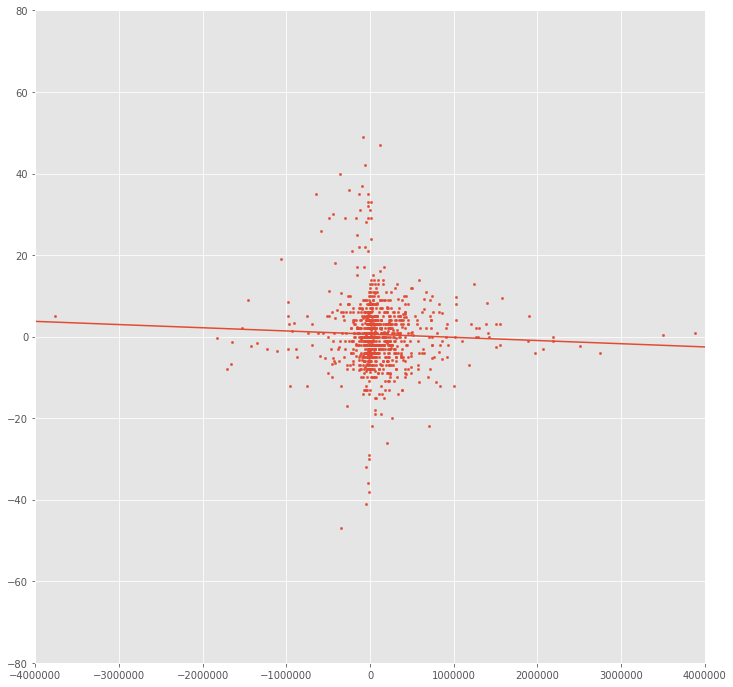

In [215]:
fig, ax = plt.subplots(1, figsize=(12,12))
z = np.linspace(-6000000, 6000000, num=1200)
ax.plot(z, plot_line(coef, intercept, z), '-')
ax.scatter(y, x, alpha=1, s=5)
ax.set_xlim(-4000000, 4000000)
ax.set_ylim(-80, 80)

In [250]:
cc_dict = {'W':'purple', 'L':'green'}
all_df['cc'] = all_df.outcome_1.apply(lambda x: cc_dict[x])

(-80, 80)

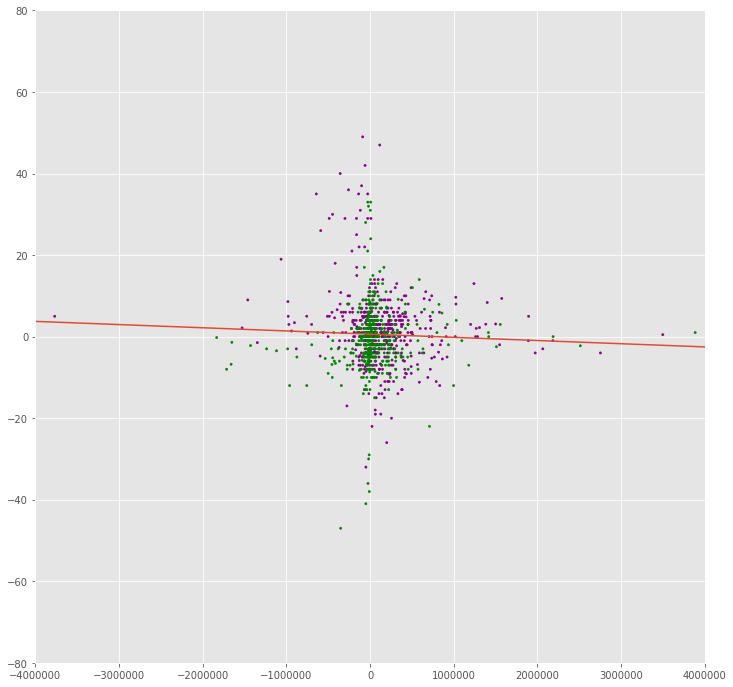

In [251]:
fig, ax = plt.subplots(1, figsize=(12,12))
z = np.linspace(-6000000, 6000000, num=1200)
ax.plot(z, plot_line(coef, intercept, z), '-')
ax.scatter(y, x, alpha=1, s=5)
ax.set_xlim(-4000000, 4000000)
ax.set_ylim(-80, 80)

### Party

In [216]:
GOP_vote = all_df[all_df.party == '200']['delta%'].values.reshape(-1,1)
GOP_spend = all_df[all_df.party == '200']['delta$'].values.reshape(-1,1)
Dem_vote = all_df[all_df.party == '100']['delta%'].values.reshape(-1,1)
Dem_spend = all_df[all_df.party == '100']['delta$'].values.reshape(-1,1)
Ind_vote = all_df[all_df.party == '328']['delta%'].values.reshape(-1,1)
Ind_spend = all_df[all_df.party == '328']['delta$'].values.reshape(-1,1)

In [217]:
lr = LinearRegression()
reg_GOP = lr.fit(GOP_spend, GOP_vote)

In [218]:
coef_GOP = reg_GOP.coef_[0][0]
intercept_GOP = reg_GOP.intercept_[0]

print('R^2 Score: ', reg_GOP.score(GOP_spend, GOP_vote))
print('Slope: ', coef_GOP)
print('Intercept: ', intercept_GOP)

R^2 Score:  4.123469156802617e-05
Slope:  1.2522938014651075e-07
Intercept:  -0.3743639652110715


In [219]:
lr = LinearRegression()
reg_Dem = lr.fit(Dem_spend, Dem_vote)

coef_Dem = reg_Dem.coef_[0][0]
intercept_Dem = reg_Dem.intercept_[0]

print('R^2 Score: ', reg_Dem.score(Dem_spend, Dem_vote))
print('Slope: ', coef_Dem)
print('Intercept: ', intercept_Dem)

R^2 Score:  0.012310682598721479
Slope:  2.9597046846072793e-06
Intercept:  -0.32460529528337834


#### Only 5 rows 

In [220]:
lr = LinearRegression()
reg_Ind = lr.fit(Ind_spend, Ind_vote)

coef_Ind = reg_Ind.coef_[0][0]
intercept_Ind = reg_Ind.intercept_[0]

print('R^2 Score: ', reg_Ind.score(Ind_spend, Ind_vote))
print('Slope: ', coef_Ind)
print('Intercept: ', intercept_Ind)

R^2 Score:  0.7259440066415728
Slope:  0.0021847470324220628
Intercept:  5.4482113796854135


(-80, 80)

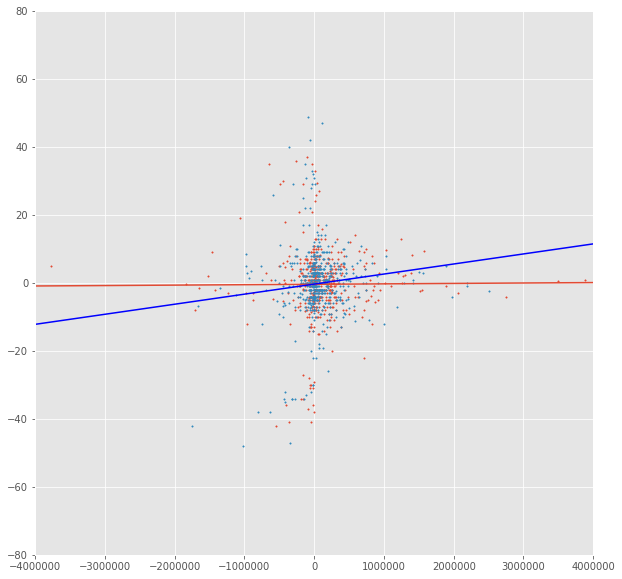

In [224]:
fig, ax = plt.subplots(1, figsize=(10,10))
z = np.linspace(-6000000, 6000000, num=1200)
ax.plot(z, plot_line(coef_GOP, intercept_GOP, z), '-')
ax.scatter(GOP_spend, GOP_vote, alpha=1, s=2)
ax.set_xlim(-4000000, 4000000)
ax.set_ylim(-80, 80)

ax.plot(z, plot_line(coef_Dem, intercept_Dem, z), '-', color='blue')
ax.scatter(Dem_spend, Dem_vote, alpha=1, s=2)
ax.set_xlim(-4000000, 4000000)
ax.set_ylim(-80, 80)

### Group A

In [125]:
plot_A = full_df[['delta_A%', 'delta_A$', 'delta_A$%']]
plot_A = plot_A.replace([np.inf, -np.inf], np.nan).dropna()

Ax = plot_A['delta_A%'].values.reshape(-1, 1)
Ay = plot_A['delta_A$'].values.reshape(-1, 1)

In [126]:
lr = LinearRegression()
reg_A = lr.fit(Ay, Ax)

In [163]:
coef_A = reg_A.coef_[0][0]
intercept_A = reg_A.intercept_[0]

print('R^2 Score: ', reg_A.score(Ay, Ax))
print('Slope: ', coef_A)
print('Intercept: ', intercept_A)

R^2 Score:  0.021066726386697376
Slope:  -2.674216643092763e-06
Intercept:  2.1723429922312625


(-60, 60)

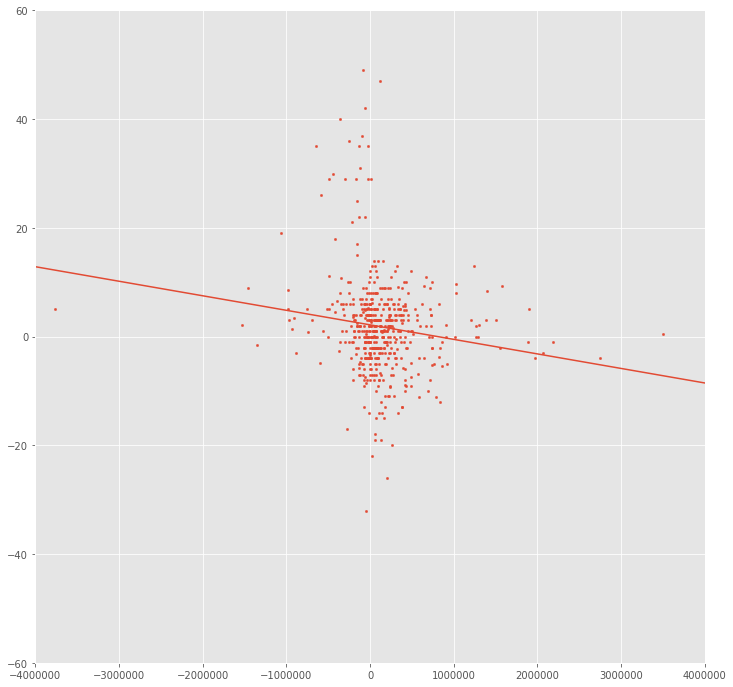

In [223]:
fig, ax = plt.subplots(1, figsize=(12,12))
z = np.linspace(-6000000, 6000000, num=1200)
ax.plot(z, plot_line(coef_A, intercept_A, z), '-')
ax.scatter(Ay, Ax, alpha=1, s=5)
ax.set_xlim(-4000000, 4000000)
ax.set_ylim(-60, 60)

### Group B

In [131]:
plot_B = full_df[['delta_B%', 'delta_B$', 'delta_B$%', ]]
plot_B = plot_B.replace([np.inf, -np.inf], np.nan).dropna()

Bx = plot_B['delta_B%'].values.reshape(-1, 1)
By = plot_B['delta_B$'].values.reshape(-1, 1)

In [132]:
lr = LinearRegression()
reg_B = lr.fit(By, Bx)

In [226]:
coef_B = reg_B.coef_[0][0]
intercept_B = reg_B.intercept_[0]

print('R^2 Score: ', reg_B.score(By,Bx))
print('Slope: ', coef_B)
print('Intercept: ', intercept_B)

R^2 Score:  0.04252336033899917
Slope:  5.624111093138197e-06
Intercept:  -2.594645395402175


(-60, 60)

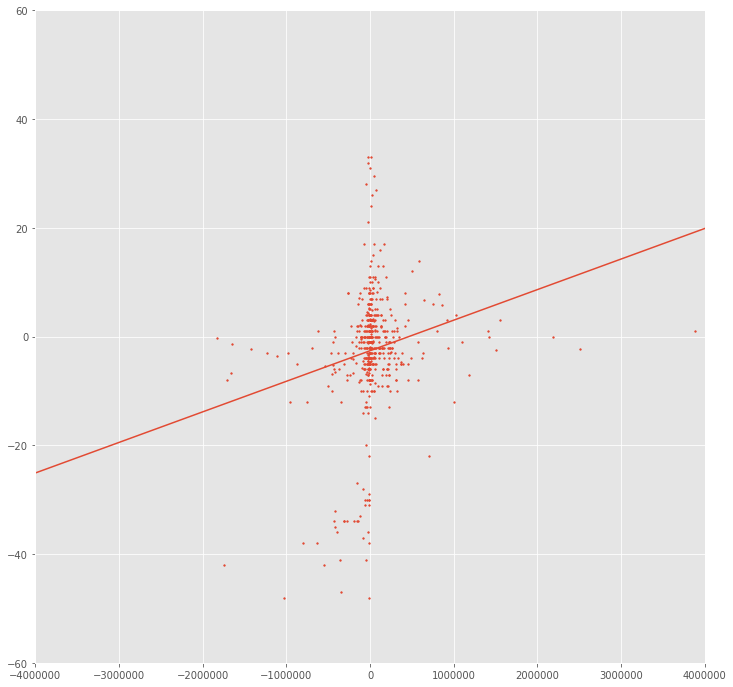

In [227]:
fig, ax = plt.subplots(1, figsize=(12,12))
z = np.linspace(-4000000, 4000000, num=1200)
ax.plot(z, plot_line(coef_B, intercept_B, z), '-')
ax.scatter(By, Bx, alpha=1, s=3)
ax.set_xlim(-4000000, 4000000)
ax.set_ylim(-60, 60)